# TensorFlow, Common Voice, DeepSpeech

## Langkah 1: Import dataset common voice yang sudah diunggah ke Google Cloud

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!tar -xvf  '/content/gdrive/MyDrive/Dataset/id.tar' -C '/content/'

Streaming output truncated to the last 5000 lines.
cv-corpus-6.1-2020-12-11/id/clips/common_voice_id_21353541.mp3
cv-corpus-6.1-2020-12-11/id/clips/common_voice_id_21353543.mp3
cv-corpus-6.1-2020-12-11/id/clips/common_voice_id_21353545.mp3
cv-corpus-6.1-2020-12-11/id/clips/common_voice_id_21387771.mp3
cv-corpus-6.1-2020-12-11/id/clips/common_voice_id_21387772.mp3
cv-corpus-6.1-2020-12-11/id/clips/common_voice_id_21387773.mp3
cv-corpus-6.1-2020-12-11/id/clips/common_voice_id_21387774.mp3
cv-corpus-6.1-2020-12-11/id/clips/common_voice_id_21387775.mp3
cv-corpus-6.1-2020-12-11/id/clips/common_voice_id_21387776.mp3
cv-corpus-6.1-2020-12-11/id/clips/common_voice_id_21387777.mp3
cv-corpus-6.1-2020-12-11/id/clips/common_voice_id_21387778.mp3
cv-corpus-6.1-2020-12-11/id/clips/common_voice_id_21387779.mp3
cv-corpus-6.1-2020-12-11/id/clips/common_voice_id_21387780.mp3
cv-corpus-6.1-2020-12-11/id/clips/common_voice_id_21425448.mp3
cv-corpus-6.1-2020-12-11/id/clips/common_voice_id_21425449.mp3
cv-c

## Langkah 2: Ubah dataset ke format .wav & pisahkan train-dev-test set

In [ ]:
!pip install pydub

In [ ]:
import pandas as pd

traindf = pd.read_csv('/content/cv-corpus-6.1-2020-12-11/id/train.tsv', sep='\t')
devdf = pd.read_csv('/content/cv-corpus-6.1-2020-12-11/id/dev.tsv', sep='\t')
testdf = pd.read_csv('/content/cv-corpus-6.1-2020-12-11/id/test.tsv', sep='\t')

In [ ]:
traindf.head()

,client_id,path,sentence,up_votes,down_votes,age,gender,accent,locale,segment
0,4c81270f49ada076d376a968994e1533674531b0fae896...,common_voice_id_19192526.mp3,Kamar adik laki-laki saya lebih sempit daripad...,2,0,twenties,male,NaN,id,NaN
1,4c81270f49ada076d376a968994e1533674531b0fae896...,common_voice_id_19192527.mp3,Ayah akan membunuhku.,2,0,twenties,male,NaN,id,NaN
2,4c81270f49ada076d376a968994e1533674531b0fae896...,common_voice_id_19192528.mp3,Ini pulpen.,2,0,twenties,male,NaN,id,NaN
3,4c81270f49ada076d376a968994e1533674531b0fae896...,common_voice_id_19192535.mp3,Akira pandai bermain tenis.,2,0,twenties,male,NaN,id,NaN
4,4c81270f49ada076d376a968994e1533674531b0fae896...,common_voice_id_19192536.mp3,Dia keluar dari ruangan tanpa mengatakan sepat...,2,1,twenties,male,NaN,id,NaN


In [ ]:
traindata = traindf['path'].replace('.mp3','',regex=True)
devdata = devdf['path'].replace('.mp3','',regex=True)
testdata = testdf['path'].replace('.mp3','',regex=True)

In [ ]:
traindata.head()

0    common_voice_id_19192526
1    common_voice_id_19192527
2    common_voice_id_19192528
3    common_voice_id_19192535
4    common_voice_id_19192536
Name: path, dtype: object

In [ ]:
!mkdir /content/cv-corpus-6.1-2020-12-11/id/clips_train/

In [ ]:
!mkdir /content/cv-corpus-6.1-2020-12-11/id/clips_dev/

In [ ]:
!mkdir /content/cv-corpus-6.1-2020-12-11/id/clips_test/

In [ ]:
from pydub import AudioSegment

for i in traindata:
  sound = AudioSegment.from_mp3("/content/cv-corpus-6.1-2020-12-11/id/clips/" + i + ".mp3")
  sound.export("/content/cv-corpus-6.1-2020-12-11/id/clips_train/" + i + ".wav", format="wav")

for i in devdata:
  sound = AudioSegment.from_mp3("/content/cv-corpus-6.1-2020-12-11/id/clips/" + i + ".mp3")
  sound.export("/content/cv-corpus-6.1-2020-12-11/id/clips_dev/" + i + ".wav", format="wav")

for i in testdata:
  sound = AudioSegment.from_mp3("/content/cv-corpus-6.1-2020-12-11/id/clips/" + i + ".mp3")
  sound.export("/content/cv-corpus-6.1-2020-12-11/id/clips_test/" + i + ".wav", format="wav")

In [ ]:
trainpaths = []
devpaths = []
testpaths = []

for i in traindata:
  a = str("/content/cv-corpus-6.1-2020-12-11/id/clips_train/" + i + ".wav")
  trainpaths.append(a)

for i in devdata:
  a = str("/content/cv-corpus-6.1-2020-12-11/id/clips_dev/" + i + ".wav")
  devpaths.append(a)

for i in testdata:
  a = str("/content/cv-corpus-6.1-2020-12-11/id/clips_test/" + i + ".wav")
  testpaths.append(a)

In [ ]:
print(trainpaths[:5])
print(devpaths[:5])
print(testpaths[:5])

['/content/cv-corpus-6.1-2020-12-11/id/clips_traincommon_voice_id_19192526.wav', '/content/cv-corpus-6.1-2020-12-11/id/clips_traincommon_voice_id_19192527.wav', '/content/cv-corpus-6.1-2020-12-11/id/clips_traincommon_voice_id_19192528.wav', '/content/cv-corpus-6.1-2020-12-11/id/clips_traincommon_voice_id_19192535.wav', '/content/cv-corpus-6.1-2020-12-11/id/clips_traincommon_voice_id_19192536.wav']
['/content/cv-corpus-6.1-2020-12-11/id/clips_devcommon_voice_id_20953537.wav', '/content/cv-corpus-6.1-2020-12-11/id/clips_devcommon_voice_id_20953540.wav', '/content/cv-corpus-6.1-2020-12-11/id/clips_devcommon_voice_id_20953541.wav', '/content/cv-corpus-6.1-2020-12-11/id/clips_devcommon_voice_id_20953542.wav', '/content/cv-corpus-6.1-2020-12-11/id/clips_devcommon_voice_id_20953586.wav']
['/content/cv-corpus-6.1-2020-12-11/id/clips_testcommon_voice_id_22888800.wav', '/content/cv-corpus-6.1-2020-12-11/id/clips_testcommon_voice_id_24015257.wav', '/content/cv-corpus-6.1-2020-12-11/id/clips_testc

## Langkah 3: Preprocess label

In [ ]:
max_target_len = 0
for i in traindf['sentence']:
  len_sentence = len(i)
  if len_sentence > max_target_len:
    max_target_len = len_sentence

In [ ]:
max_target_len

99

In [ ]:
traindf.head()

,client_id,path,sentence,up_votes,down_votes,age,gender,accent,locale,segment
0,4c81270f49ada076d376a968994e1533674531b0fae896...,common_voice_id_19192526.mp3,Kamar adik laki-laki saya lebih sempit daripad...,2,0,twenties,male,NaN,id,NaN
1,4c81270f49ada076d376a968994e1533674531b0fae896...,common_voice_id_19192527.mp3,Ayah akan membunuhku.,2,0,twenties,male,NaN,id,NaN
2,4c81270f49ada076d376a968994e1533674531b0fae896...,common_voice_id_19192528.mp3,Ini pulpen.,2,0,twenties,male,NaN,id,NaN
3,4c81270f49ada076d376a968994e1533674531b0fae896...,common_voice_id_19192535.mp3,Akira pandai bermain tenis.,2,0,twenties,male,NaN,id,NaN
4,4c81270f49ada076d376a968994e1533674531b0fae896...,common_voice_id_19192536.mp3,Dia keluar dari ruangan tanpa mengatakan sepat...,2,1,twenties,male,NaN,id,NaN


In [ ]:
target_train = traindf['sentence']
target_dev = devdf['sentence']
target_test = testdf['sentence']

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=50000, oov_token='x')
tokenizer.fit_on_texts(target_train)
text_sequence_train = tokenizer.texts_to_sequences(target_train)
trainlabels = pad_sequences(text_sequence_train, padding='post', truncating='post')

In [ ]:
trainlabels

array([[  79,  178,   92, ...,    0,    0,    0],
       [ 132,   15, 1070, ...,    0,    0,    0],
       [   4, 1071,    0, ...,    0,    0,    0],
       ...,
       [   5, 1060,   95, ...,    0,    0,    0],
       [   7,    5,  314, ...,    0,    0,    0],
       [  95, 2415, 2416, ...,    0,    0,    0]], dtype=int32)

In [ ]:
type(trainlabels)

numpy.ndarray

In [ ]:
import tensorflow as tf

trainlabels = tf.convert_to_tensor(trainlabels)
type(trainlabels)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
tokenizer = Tokenizer(num_words=50000, oov_token='x')
tokenizer.fit_on_texts(target_dev)
text_sequence_dev = tokenizer.texts_to_sequences(target_dev)
devlabels = pad_sequences(text_sequence_dev, padding='post', truncating='post')

In [ ]:
devlabels = tf.convert_to_tensor(devlabels)
type(devlabels)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
tokenizer = Tokenizer(num_words=50000, oov_token='x')
tokenizer.fit_on_texts(target_test)
text_sequence_train = tokenizer.texts_to_sequences(target_test)
testlabels = pad_sequences(text_sequence_train, padding='post', truncating='post')

In [ ]:
testlabels = tf.convert_to_tensor(testlabels)
type(testlabels)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
import numpy as np
print(np.shape(trainpaths))
print(np.shape(trainlabels))
print(np.shape(devpaths))
print(np.shape(devlabels))
print(np.shape(testpaths))
print(np.shape(testlabels))

(2130,)
(2130, 14)
(1835,)
(1835, 14)
(1844,)
(1844, 14)


## Langkah 4: Preprocess data audio & pasangkan dengan labelnya

In [ ]:
import tensorflow as tf

def path_to_audio(path):
    audio = tf.io.read_file(path)
    audio, _ = tf.audio.decode_wav(audio, 1, 16000)
    return audio

def paths_and_labels_to_dataset(audio_paths, labels):
    path_ds = tf.data.Dataset.from_tensor_slices(audio_paths)
    audio_ds = path_ds.map(lambda x: path_to_audio(x))
    label_ds = tf.data.Dataset.from_tensor_slices(labels)
    return tf.data.Dataset.zip((audio_ds, label_ds))

In [ ]:
train_dataset = paths_and_labels_to_dataset(trainpaths, trainlabels)
dev_dataset = paths_and_labels_to_dataset(devpaths, devlabels)
test_dataset = paths_and_labels_to_dataset(testpaths, testlabels)

ValueError: ignored

In [ ]:
try_ = path_to_audio("/content/cv-corpus-6.1-2020-12-11/id/clips_dev/common_voice_id_19056654.wav")

In [ ]:
print(try_)

tf.Tensor(
[[ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 ...
 [-6.1035156e-05]
 [-9.1552734e-05]
 [-9.1552734e-05]], shape=(16000, 1), dtype=float32)


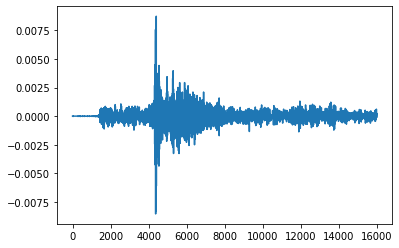

In [ ]:
import matplotlib.pyplot as plt

plt.plot(try_)
plt.show()

In [ ]:
print(len(train_dataset))
print(len(dev_dataset))
print(len(test_dataset))

2130
1835
1844


## Langkah 5: Melatih model

### Training DeepSpeech Using Pretrained Model (.pb)


In [ ]:
!curl -LO https://github.com/mozilla/DeepSpeech/releases/download/v0.6.0/deepspeech-0.6.0-models.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   636  100   636    0     0   4386      0 --:--:-- --:--:-- --:--:--  4416
100 1172M  100 1172M    0     0  54.0M      0  0:00:21  0:00:21 --:--:-- 65.6M


In [ ]:
!tar xvf deepspeech-0.6.0-models.tar.gz

deepspeech-0.6.0-models/
deepspeech-0.6.0-models/lm.binary
deepspeech-0.6.0-models/output_graph.pbmm
deepspeech-0.6.0-models/output_graph.pb
deepspeech-0.6.0-models/trie
deepspeech-0.6.0-models/output_graph.tflite


In [ ]:
import tensorflow as tf
deepspeech_model = tf.keras.models.load_model('/content/deepspeech-0.6.0-models/')
deepspeech_model.summary()

OSError: ignored

### Training DeepSpeech Using Python Script (https://medium.com/visionwizard/train-your-own-speech-recognition-model-in-5-simple-steps-512d5ac348a5)

In [ ]:
!git clone -b 'v0.6.0' --single-branch --depth 1 https://github.com/mozilla/DeepSpeech.git

Cloning into 'DeepSpeech'...
remote: Enumerating objects: 1656, done.
remote: Counting objects: 100% (1656/1656), done.
remote: Compressing objects: 100% (1113/1113), done.
remote: Total 1656 (delta 565), reused 1343 (delta 481), pack-reused 0
Receiving objects: 100% (1656/1656), 3.92 MiB | 14.25 MiB/s, done.
Resolving deltas: 100% (565/565), done.
Note: checking out '6d43e213a73d0efa141941196b45b8e8191daf46'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>



In [ ]:
!pip install colab-env -qU
import colab_env

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!more gdrive/My\ Drive/vars.env

COLAB_ENV = Active


In [ ]:
!cd DeepSpeech
!pip install -r DeepSpeech/requirements.txt
!pip install deepspeech==0.6.0
!pip install ds_ctcdecoder
!pip install tensorflow-gpu==1.14.0
!pip install -U numpy
!pip install sox

     |████████████████████████████████| 109.3MB 38kB/s 
     |████████████████████████████████| 13.9MB 16.0MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
     |████████████████████████████████| 71kB 7.9MB/s 
     |████████████████████████████████| 215kB 48.4MB/s 
     |████████████████████████████████| 3.2MB 31.9MB/s 
     |████████████████████████████████| 491kB 34.2MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
     |████████████████████████████████| 3.2MB 31.7MB/s 
     |████████████████████████████████| 962kB 21.7MB/s 
     |████████████████████████████████| 71kB 6.6MB/s 
  Created wheel for webrtcvad: filename=webrtcvad-2.0.10-cp37-cp37m-linux_x86_64.whl size=72311 sha256=f13b6aa1f19c0888b271746265203081fa2ed45342e8f479ff763817f3378987
  Stored in directory: /root/.cache/pip/wheels/44/2a/18/bd1aec41cac7c3051fe95d92a6ed446122ea31dc713c432fa1
Successfully built webrtcvad
ERROR: xarray 0.18.0 has requirement numpy>=1.17, but you'll have numpy 1.15.4 which is

     |████████████████████████████████| 9.6MB 4.1MB/s 
     |████████████████████████████████| 2.1MB 4.0MB/s 
     |████████████████████████████████| 377.1MB 40kB/s 


     |████████████████████████████████| 15.3MB 345kB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.15.4
    Uninstalling numpy-1.15.4:
      Successfully uninstalled numpy-1.15.4


In [ ]:
!mkdir fine_tuning_checkpoints
!mkdir output_models

In [ ]:
import pandas as pd
dftrain = pd.read_csv('/content/cv-corpus-6.1-2020-12-11/id/train.tsv', sep='\t')
dfdev = pd.read_csv('/content/cv-corpus-6.1-2020-12-11/id/dev.tsv', sep='\t')
dftest = pd.read_csv('/content/cv-corpus-6.1-2020-12-11/id/test.tsv', sep='\t')

In [ ]:
!pip install pydub

In [ ]:
!mkdir /content/cv-corpus-6.1-2020-12-11/id/clips_wav

In [ ]:
from pydub import AudioSegment

for i in dftrain['path']:
  path = "/content/cv-corpus-6.1-2020-12-11/id/clips/" + i
  sound = AudioSegment.from_mp3(path)
  sound.export("/content/cv-corpus-6.1-2020-12-11/id/clips_wav/" + i, format="wav")

for i in dfdev['path']:
  path = "/content/cv-corpus-6.1-2020-12-11/id/clips/" + i
  sound = AudioSegment.from_mp3(path)
  sound.export("/content/cv-corpus-6.1-2020-12-11/id/clips_wav/" + i, format="wav")

for i in dftest['path']:
  path = "/content/cv-corpus-6.1-2020-12-11/id/clips/" + i
  sound = AudioSegment.from_mp3(path)
  sound.export("/content/cv-corpus-6.1-2020-12-11/id/clips_wav/" + i, format="wav")

In [ ]:
dftrain.head()

,client_id,path,sentence,up_votes,down_votes,age,gender,accent,locale,segment
0,4c81270f49ada076d376a968994e1533674531b0fae896...,common_voice_id_19192526.mp3,Kamar adik laki-laki saya lebih sempit daripad...,2,0,twenties,male,NaN,id,NaN
1,4c81270f49ada076d376a968994e1533674531b0fae896...,common_voice_id_19192527.mp3,Ayah akan membunuhku.,2,0,twenties,male,NaN,id,NaN
2,4c81270f49ada076d376a968994e1533674531b0fae896...,common_voice_id_19192528.mp3,Ini pulpen.,2,0,twenties,male,NaN,id,NaN
3,4c81270f49ada076d376a968994e1533674531b0fae896...,common_voice_id_19192535.mp3,Akira pandai bermain tenis.,2,0,twenties,male,NaN,id,NaN
4,4c81270f49ada076d376a968994e1533674531b0fae896...,common_voice_id_19192536.mp3,Dia keluar dari ruangan tanpa mengatakan sepat...,2,1,twenties,male,NaN,id,NaN


In [ ]:
dfdev.head()

,client_id,path,sentence,up_votes,down_votes,age,gender,accent,locale,segment
0,0dc722012806d1d82744b49e7ce34bbdb8ccff93d94598...,common_voice_id_20953537.mp3,Banyak orang meninggal.,2,1,twenties,male,NaN,id,NaN
1,0dc722012806d1d82744b49e7ce34bbdb8ccff93d94598...,common_voice_id_20953540.mp3,Dia akan menjadi doktor dalam dua tahun.,2,0,twenties,male,NaN,id,NaN
2,0dc722012806d1d82744b49e7ce34bbdb8ccff93d94598...,common_voice_id_20953541.mp3,Saya menggunakan garpu ketika makan keik.,2,1,twenties,male,NaN,id,NaN
3,0dc722012806d1d82744b49e7ce34bbdb8ccff93d94598...,common_voice_id_20953542.mp3,Kapal akan berlabuh di Cadiz.,2,1,twenties,male,NaN,id,NaN
4,0dc722012806d1d82744b49e7ce34bbdb8ccff93d94598...,common_voice_id_20953586.mp3,Apakah di sini sering hujan saat musim panas?,2,0,twenties,male,NaN,id,NaN


In [ ]:
dftest.head()

,client_id,path,sentence,up_votes,down_votes,age,gender,accent,locale,segment
0,057bf45c0c338db897f5717f744bcac8a2ac2eee990a42...,common_voice_id_22888800.mp3,Minggu depan kakak perempuan saya menikah.,2,0,NaN,NaN,NaN,id,NaN
1,0835fbbf1d609a6ed421eef134a48ff06d719121b41f3b...,common_voice_id_24015257.mp3,Berbagai bahasa daerah dan bahasa asing menjad...,2,1,NaN,NaN,NaN,id,NaN
2,0c8ac0307f35c73b09d8fc0d92e4c183e3078adee87212...,common_voice_id_24015280.mp3,apa yang bisa saya berikan kepadamu?,2,0,NaN,NaN,NaN,id,NaN
3,19285f8e012ad31cad237d53bab348ce59a5cc13684754...,common_voice_id_20425643.mp3,Inilah dunia kecil.,2,1,NaN,NaN,NaN,id,NaN
4,3502377c5fb712169a3f2fe5583906e4b3a5ecba27bf2c...,common_voice_id_22185104.mp3,nol,2,0,NaN,NaN,NaN,id,Benchmark


Format file .csv yang diminta:

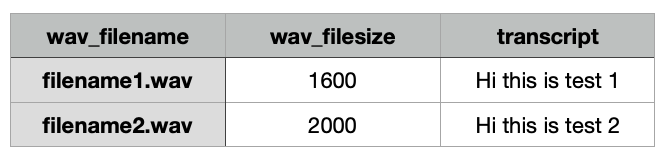

In [ ]:
filename = []
for i in dftrain['path']:
  i = i.replace('.mp3','.wav')
  filename.append(i)

paths = []
for i in filename:
  a = "/content/cv-corpus-6.1-2020-12-11/id/clips_wav/" + i
  paths.append(a)

filesize = []
for i in paths:
  try:
    size = Path(i).stat().st_size
    filesize.append(size)
  except FileNotFoundError:
    filesize.append(0)

In [ ]:
for i in paths:
  print(i)
  /content/cv-corpus-6.1-2020-12-11/id/clips_train/common_voice_id_19059295.wav

/content/cv-corpus-6.1-2020-12-11/id/clips_wav/common_voice_id_19192526.wav
/content/cv-corpus-6.1-2020-12-11/id/clips_wav/common_voice_id_19192527.wav
/content/cv-corpus-6.1-2020-12-11/id/clips_wav/common_voice_id_19192528.wav
/content/cv-corpus-6.1-2020-12-11/id/clips_wav/common_voice_id_19192535.wav
/content/cv-corpus-6.1-2020-12-11/id/clips_wav/common_voice_id_19192536.wav
/content/cv-corpus-6.1-2020-12-11/id/clips_wav/common_voice_id_19192537.wav
/content/cv-corpus-6.1-2020-12-11/id/clips_wav/common_voice_id_19192551.wav
/content/cv-corpus-6.1-2020-12-11/id/clips_wav/common_voice_id_19192552.wav
/content/cv-corpus-6.1-2020-12-11/id/clips_wav/common_voice_id_19192553.wav
/content/cv-corpus-6.1-2020-12-11/id/clips_wav/common_voice_id_19192561.wav
/content/cv-corpus-6.1-2020-12-11/id/clips_wav/common_voice_id_19192563.wav
/content/cv-corpus-6.1-2020-12-11/id/clips_wav/common_voice_id_19192564.wav
/content/cv-corpus-6.1-2020-12-11/id/clips_wav/common_voice_id_19192575.wav
/content/cv-

In [ ]:
from pathlib import Path
import string

def manip_dataframe(dataframe, set_type):
  filename = []
  for i in dataframe['path']:
    i = i.replace('.mp3','.wav')
    filename.append(i)
  
  paths = []
  for i in filename:
    a = "/content/cv-corpus-6.1-2020-12-11/id/clips_" + set_type + "/" + i
    paths.append(a)

  filesize = []
  for i in paths:
    size = Path(i).stat().st_size
    filesize.append(size)
  
  trans = []
  for i in dataframe['sentence']:
    i = i.lower()
    i = "".join([a for a in i if a not in string.punctuation])
    trans.append(i)

  new_dataframe = pd.DataFrame(list(zip(filename, filesize, trans)), columns =['wav_filename', 'wav_filesize', 'transcript'])
  return new_dataframe

dftrain_new = manip_dataframe(dftrain, "train")
dfdev_new = manip_dataframe(dfdev, "dev")
dftest_new = manip_dataframe(dftest, "test")

In [ ]:
dftrain_new.head()

,wav_filename,wav_filesize,transcript
0,common_voice_id_19192526.wav,629036,kamar adik lakilaki saya lebih sempit daripada...
1,common_voice_id_19192527.wav,373292,ayah akan membunuhku
2,common_voice_id_19192528.wav,253484,ini pulpen
3,common_voice_id_19192535.wav,364076,akira pandai bermain tenis
4,common_voice_id_19192536.wav,520748,dia keluar dari ruangan tanpa mengatakan sepat...


In [ ]:
dfdev_new.head()

,wav_filename,wav_filesize,transcript
0,common_voice_id_20953537.wav,364076,banyak orang meninggal
1,common_voice_id_20953540.wav,368684,dia akan menjadi doktor dalam dua tahun
2,common_voice_id_20953541.wav,541484,saya menggunakan garpu ketika makan keik
3,common_voice_id_20953542.wav,447020,kapal akan berlabuh di cadiz
4,common_voice_id_20953586.wav,398636,apakah di sini sering hujan saat musim panas


In [ ]:
dftest_new.head()

,wav_filename,wav_filesize,transcript
0,common_voice_id_22888800.wav,412460,minggu depan kakak perempuan saya menikah
1,common_voice_id_24015257.wav,546092,berbagai bahasa daerah dan bahasa asing menjad...
2,common_voice_id_24015280.wav,313388,apa yang bisa saya berikan kepadamu
3,common_voice_id_20425643.wav,251180,inilah dunia kecil
4,common_voice_id_22185104.wav,193580,nol


In [ ]:
dftrain_new.to_csv('/content/cv-corpus-6.1-2020-12-11/id/train.csv')
dfdev_new.to_csv('/content/cv-corpus-6.1-2020-12-11/id/dev.csv')
dftest_new.to_csv('/content/cv-corpus-6.1-2020-12-11/id/test.csv')

In [ ]:
!apt-get install libsox-fmt-all libsox-dev sox > /dev/null

In [ ]:
!/content/DeepSpeech/DeepSpeech.py --helpfull

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [ ]:
!python3 /content/DeepSpeech/DeepSpeech.py --n_hidden 2048 --checkpoint_dir /content/fine_tuning_checkpoints/ --epochs 3 --train_files /content/cv-corpus-6.1-2020-12-11/id/train.csv --dev_files /content/cv-corpus-6.1-2020-12-11/id/dev.csv --test_files /content/cv-corpus-6.1-2020-12-11/id/test.csv --learning_rate 0.0001 --export_dir /content/output_models/ --alphabet_config_path /content/DeepSpeech/data/alphabet.txt --use_allow_growth true --use_cudnn_rnn true

## --n_hidden : Number of hidden layers in network
## --checkpoint_dir : Folder path to store checkpoints 
## --epochs : Number of Epochs 
## --train_files : Path to training CSV
## --dev_files : Path to dev CSV
## --test_files : Path to test CSV 
## --learning_rate : Specify learning rate
## --export_dir : Folder path to store inference model

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

### Pake Keras Aja Deh

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Dropout, Dense
from tensorflow.keras.layers import Bidirectional, LSTM, TimeDistributed

model = tf.keras.Sequential([
  tf.keras.layers.Conv1D(8, 13, padding='valid', activation='relu', input_shape=(16000, 1)),
  tf.keras.layers.MaxPooling1D(3),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Conv1D(16, 11, padding='valid', activation='relu'),
  tf.keras.layers.MaxPooling1D(3),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Conv1D(32, 9, padding='valid', activation='relu'),
  tf.keras.layers.MaxPooling1D(3),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.BatchNormalization(axis=-1),
  tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, return_sequences=True), merge_mode='sum'),
  tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, return_sequences=True), merge_mode='sum'),
  tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, return_sequences=True), merge_mode='sum'),
  tf.keras.layers.BatchNormalization(axis=-1),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(14, activation='relu')
])

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_48 (Conv1D)           (None, 15988, 8)          112       
_________________________________________________________________
max_pooling1d_48 (MaxPooling (None, 5329, 8)           0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 5329, 8)           0         
_________________________________________________________________
conv1d_49 (Conv1D)           (None, 5319, 16)          1424      
_________________________________________________________________
max_pooling1d_49 (MaxPooling (None, 1773, 16)          0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 1773, 16)          0         
_________________________________________________________________
conv1d_50 (Conv1D)           (None, 1765, 32)        

In [ ]:
model.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])

In [ ]:
hist = model.fit(
    train_dataset,
    epochs=100,
    validation_data=dev_dataset
)

Epoch 1/100


ValueError: ignored